In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/best_mask_model.h5')

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

IMG_HEIGHT = 224
IMG_WIDTH = 224


def predict_mask(model, image_path):
    try:
        img = cv2.imread(image_path)
        if img is None:
            print(f"Error: Could not read image from {image_path}")
            return None

        cv2_imshow(img)

        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_resized = cv2.resize(img_rgb, (IMG_HEIGHT, IMG_WIDTH))
        img_scaled = img_resized / 255.0
        img_reshaped = np.expand_dims(img_scaled, axis=0)

        prediction = model.predict(img_reshaped, verbose=0)[0][0]
        confidence = prediction if prediction > 0.5 else 1 - prediction

        if prediction > 0.5:
            result = "WITHOUT MASK"
            color = (0, 0, 255)
        else:
            result = "WITH MASK"
            color = (0, 255, 0)

        print(f"\nPrediction: {result}")
        print(f"Confidence: {confidence:.2%}")

        img_with_text = img.copy()
        cv2.putText(img_with_text, f"{result} ({confidence:.1%})",
                   (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
        cv2_imshow(img_with_text)

        return prediction

    except Exception as e:
        print(f"Error during prediction: {str(e)}")
        return None

PREDICTION SYSTEM RESULT :
Enter the path of the image to be predicted: /content/download (2).jpg


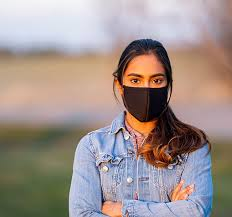


Prediction: WITH MASK
Confidence: 99.99%


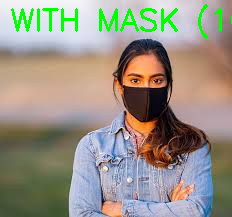

In [ ]:
print("PREDICTION SYSTEM RESULT :")

image_path = input("Enter the path of the image to be predicted: ")
prediction = predict_mask(model, image_path)


def predict_batch(model, image_paths):
    "Prediction System Result :"
    predictions = []
    for path in image_paths:
        print(f"\nProcessing: {path}")
        pred = predict_mask(model, path)
        if pred is not None:
            predictions.append(pred)
    return predictions